In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import ticker, colors, cm
import matplotlib as mpl
from scipy.interpolate import LinearNDInterpolator, interp1d

In [2]:
# TODO: write one to read the originial FRIED data?

In [3]:
class FRIED():
        
    def __init__(self, mstar=0.1, pah=0.1, dust=True, fuv=10):

        mstar_ls = [0.1, 0.3, 0.6, 1.0, 1.5, 3.0]
        pah_ls   = [0.1, 0.5]

        if mstar not in mstar_ls:
            raise Exception("Stellar mass should have a value in 0.1, 0.3, 0.6, 1.0, 1.5, 3.0")
        if pah not in pah_ls:
            raise Exception("The value of PAH should be selected from in 0.1, 0.5")
        
        self.mstar = mstar
        self.pah_ratio = pah
        self.dust_grow = dust
        self.FUV       = fuv

        if self.dust_grow == True:
            suffix = 'growth'
        else:
            suffix = 'ism'

        # TODO:check if self.mstar is in the range of the expected value
        # if not choose the nearest value! 
        # and print a warning!

        frac_m, whole_m = math.modf(self.mstar)
        frac_m = int(frac_m*10)
        whole_m = int(whole_m)
        self.mstar = f'{whole_m}p{frac_m}'

        frac_p, whole_p = math.modf(self.pah_ratio)
        frac_p = int(frac_p*10)
        whole_p = int(whole_p)
        self.pah_ratio  = f'{whole_p}p{frac_p}'
        
        self.name = f'FRIEDV2_{self.mstar}Msol_fPAH{self.pah_ratio}_{suffix}.dat'
        
    def read_data(self):

        df = pd.read_csv('./data/'+self.name, names = ['Host star mass [Msol]', 'Disc outer radius [au]', 
                                'Surface density at 1au [gcm-2]', 'Surface density at disc outer edge [gcm-2]',
                                'FUV field strength at outer edge of grid [G0]', 'Mass loss rate [log10(Msol/yr)]'])
        df = df[df['FUV field strength at outer edge of grid [G0]'] == self.FUV]
        
        return df

    def implement(self):

        '''following the description in Sellek et al. (2020) 
           and Garate et al. (2023).

        '''

In [4]:
f = FRIED(mstar = 1.0, pah= 0.1, dust = True, fuv=1000)

In [5]:
data = f.read_data()

In [6]:
f.name

'FRIEDV2_1p0Msol_fPAH0p1_growth.dat'

In [7]:
data

,Host star mass [Msol],Disc outer radius [au],Surface density at 1au [gcm-2],Surface density at disc outer edge [gcm-2],FUV field strength at outer edge of grid [G0],Mass loss rate [log10(Msol/yr)]
180,1.0,500.0,1.0,0.002000,1000.0,-7.220841
181,1.0,250.0,1.0,0.004000,1000.0,-7.381847
182,1.0,150.0,1.0,0.006667,1000.0,-8.948304
183,1.0,100.0,1.0,0.010000,1000.0,-11.629609
184,1.0,80.0,1.0,0.012500,1000.0,-12.503484
185,1.0,60.0,1.0,0.016667,1000.0,-12.490190
186,1.0,40.0,1.0,0.025000,1000.0,-13.246991
187,1.0,20.0,1.0,0.050000,1000.0,-14.271428
188,1.0,10.0,1.0,0.100000,1000.0,-15.480904
189,1.0,5.0,1.0,0.200000,1000.0,-16.173819


In [8]:
sigma_in  = np.unique(data['Surface density at 1au [gcm-2]'].values)
length    = data[data['Surface density at 1au [gcm-2]']==sigma_in[0]].shape[0]
r_out_uni = np.unique(data['Disc outer radius [au]'].values)
sigma_out = np.unique(data['Surface density at disc outer edge [gcm-2]'].values)

In [9]:
sigma_ = np.zeros((sigma_in.shape[0],length))

In [10]:
for ind, i in enumerate(sigma_in):
    #print(i)
    data2 = data[data['Surface density at 1au [gcm-2]'].values==i]
    sigma_[ind, :]= data2['Surface density at disc outer edge [gcm-2]'].values

In [11]:
sigma_

array([[2.000000e-03, 4.000000e-03, 6.666667e-03, 1.000000e-02,
        1.250000e-02, 1.666667e-02, 2.500000e-02, 5.000000e-02,
        1.000000e-01, 2.000000e-01],
       [2.000000e-02, 4.000000e-02, 6.666667e-02, 1.000000e-01,
        1.250000e-01, 1.666667e-01, 2.500000e-01, 5.000000e-01,
        1.000000e+00, 2.000000e+00],
       [2.000000e-01, 4.000000e-01, 6.666667e-01, 1.000000e+00,
        1.250000e+00, 1.666667e+00, 2.500000e+00, 5.000000e+00,
        1.000000e+01, 2.000000e+01],
       [2.000000e+00, 4.000000e+00, 6.666667e+00, 1.000000e+01,
        1.250000e+01, 1.666667e+01, 2.500000e+01, 5.000000e+01,
        1.000000e+02, 2.000000e+02],
       [2.000000e+01, 4.000000e+01, 6.666667e+01, 1.000000e+02,
        1.250000e+02, 1.666667e+02, 2.500000e+02, 5.000000e+02,
        1.000000e+03, 2.000000e+03],
       [2.000000e+02, 4.000000e+02, 6.666667e+02, 1.000000e+03,
        1.250000e+03, 1.666667e+03, 2.500000e+03, 5.000000e+03,
        1.000000e+04, 2.000000e+04]])

In [12]:
mdot = np.zeros((len(r_out_uni), len(sigma_out)))

In [13]:
r_out_uni

array([  5.,  10.,  20.,  40.,  60.,  80., 100., 150., 250., 500.])

In [14]:
for ind_i, i in enumerate(r_out_uni):
    for ind_j, j in enumerate(sigma_out):
        model = data[(data['Disc outer radius [au]']==i) & (data['Surface density at disc outer edge [gcm-2]']==j)]
        if len(model)!=0:
            mdot[ind_i,ind_j] = 10 ** (model['Mass loss rate [log10(Msol/yr)]'].values)
        else: 
            pass

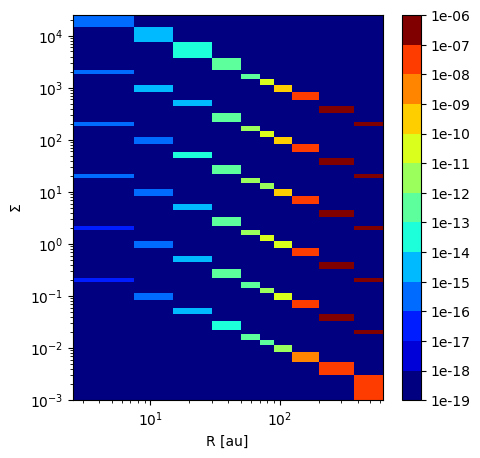

In [15]:
fig, ax =plt.subplots(1, 1, figsize=(5, 5))
bounds = np.logspace(-19, -6, 14)
cmap = mpl.colormaps['jet'].resampled(len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
im1= ax.pcolormesh(r_out_uni, sigma_out,  mdot.T, cmap=cmap, norm=norm)#, locator=ticker.LogLocator())#, cmap='jet')
ax.set_xlabel('R [au]')
ax.set_ylabel(r'$\Sigma$')
ax.set_xscale('log')
ax.set_yscale('log')

cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)

In [16]:
r = data['Disc outer radius [au]'].values
sigma = data['Surface density at disc outer edge [gcm-2]'].values
mdot = 10**(data['Mass loss rate [log10(Msol/yr)]'].values)

In [17]:
r_new = np.linspace(5, r.max(), 1000)[::-1]
sigma_new = np.logspace(np.log10(sigma.min()), np.log10(sigma.max()), 1000)

In [18]:
xx, yy = np.meshgrid(r_new, sigma_new)

In [19]:
interp = LinearNDInterpolator(list(zip(r, sigma)), mdot)

In [20]:
mdot_new = interp(xx, yy).T

In [21]:
sigma_up_lim_fit = interp1d(r_out_uni, sigma_[-1,:][::-1])
sigma_lo_lim_fit = interp1d(r_out_uni, sigma_[0,:][::-1])

In [22]:
sigma_up = sigma_up_lim_fit(r_new)
sigma_lo = sigma_lo_lim_fit(r_new)

In [23]:
mdot_new.shape

(1000, 1000)

In [24]:
for ind, val in enumerate(r_new):
    for ind_2, val2 in enumerate(sigma_new):
        if (val2> sigma_up[ind]) | (val2 < sigma_lo[ind]):
            #print(mdot_new[ind, ind_2])
            mdot_new[ind, ind_2] = np.nan

In [25]:
for ind, val in enumerate(r_new):

    loc_not_nan = np.where(~np.isnan(mdot_new[ind,:]))
    loc_nan = np.where(np.isnan(mdot_new[ind,:])) # location with (no) interpolate mdot
    if len(loc_not_nan[0])!=0:
        sigma_max = sigma_new[loc_not_nan].max()
        sigma_min = sigma_new[loc_not_nan].min()
        mdot_max  = np.nanmax(mdot_new[ind, :])
        mdot_min  = np.nanmin(mdot_new[ind, :])
        
        
        #print(ind, loc_nan)
        for i in loc_nan[0]:
            if sigma_new[i]>sigma_max:
                mdot_new[ind, i]=mdot_max
            elif sigma_new[i]<sigma_min:
                mdot_new[ind, i]= mdot_min * sigma_new[i]/sigma_min
        #if np.hstack((loc_not_nan, loc_nan))==range(len(r_new)):
        #    print(ind)
    else:
        pass

In [26]:
#mdot_new[np.where(np.isnan(mdot_new))]=1e-30

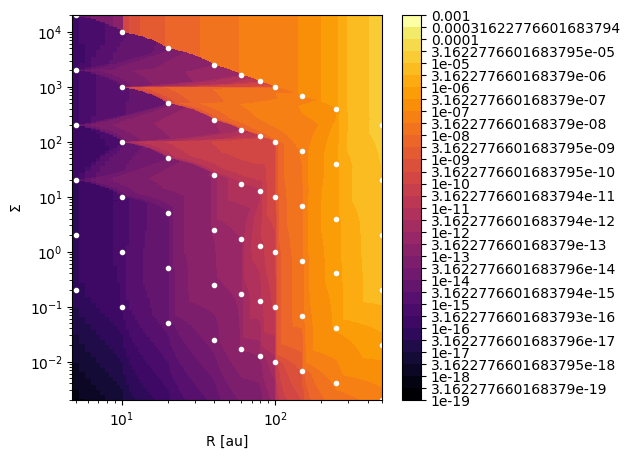

In [37]:
fig, ax =plt.subplots(1, 1, figsize=(5, 5))
bounds = np.logspace(-19, -3, 33)
cmap = mpl.colormaps['inferno'].resampled(len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
im1= ax.pcolormesh(r_new, sigma_new, mdot_new.T, cmap=cmap, norm=norm)#, locator=ticker.LogLocator())#, cmap='jet')
#, shading='nearest'
ax.set_xlabel('R [au]')
ax.set_ylabel(r'$\Sigma$')
ax.set_xscale('log')
ax.set_yscale('log')

for i in range(sigma_.shape[0]):
    ax.scatter(r_out_uni[::-1], sigma_[i, :], color='white', marker='.')

#ax.plot(r_new, sigma_up)
#ax.plot(r_new, sigma_lo)

cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)